This assignment will read in a CSV file and plot various variables.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading data

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
df.head(3)

C:\Users\Marcella\AppData\Local\Temp\ipykernel_15072\1730729597.py:6: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [4]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\Marcella\AppData\Local\Temp\ipykernel_15072\3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [14]:
print(df.dtypes)
df.head(10)

date     datetime64[ns]
ind               int64
rain             object
ind.1             int64
temp            float64
ind.2             int64
wetb            float64
dewpt           float64
vappr           float64
rhum              int64
msl              object
ind.3             int64
wdsp             object
ind.4             int64
wddir            object
ww               object
w                object
sun             float64
vis              object
clht             object
clamt            object
day              object
dtype: object


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,day
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,25,81,0.0,35000,32,5,1996-04-10
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,25,82,0.0,40000,45,5,1996-07-31
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,80,81,0.0,8000,32,7,1996-07-31
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,25,82,0.0,28000,35,6,1996-07-31
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,2,11,0.0,40000,40,6,1996-07-31
5,1996-07-31 12:00:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,1,82,0.0,40000,43,6,1996-07-31
6,1996-07-31 13:00:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,...,0,0,0,2,11,0.0,40000,43,5,1996-07-31
7,1996-07-31 14:00:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,...,0,0,0,2,11,0.0,50000,45,6,1996-07-31
8,1996-07-31 15:00:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,...,0,0,0,25,82,0.0,8000,45,7,1996-07-31
9,1996-07-31 16:00:00,0,0.0,0,15.1,0,11.3,7.5,0.0,0,...,0,0,0,25,82,0.0,35000,40,7,1996-07-31


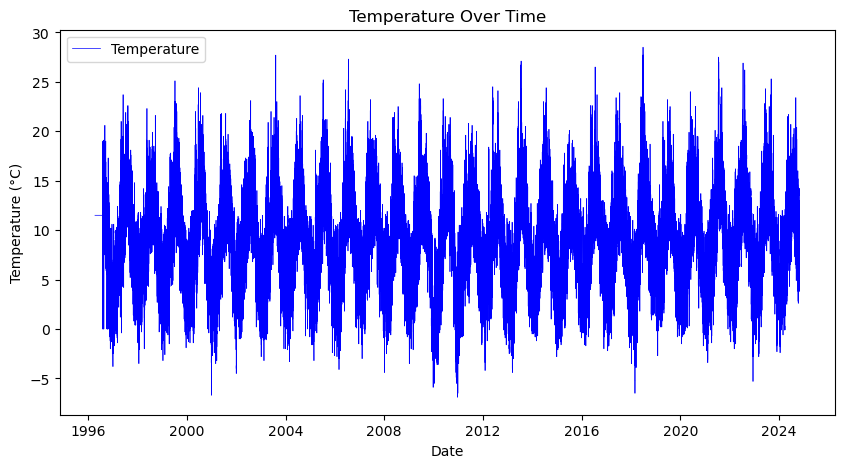

In [11]:
# Plot the temperature
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['temp'], label='Temperature', color='blue', linewidth=0.5)
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [13]:
df['day'] = df['date'].dt.date # dropping the time to make new colume with just the day

daily_mean_temp = df.groupby('day')['temp'].mean() # groups the data by day and calculates the mean temperature.
print (daily_mean_temp)

day
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
                ...    
2024-10-28    11.487500
2024-10-29    10.445833
2024-10-30    10.983333
2024-10-31    10.554167
2024-11-01     9.700000
Name: temp, Length: 10322, dtype: float64


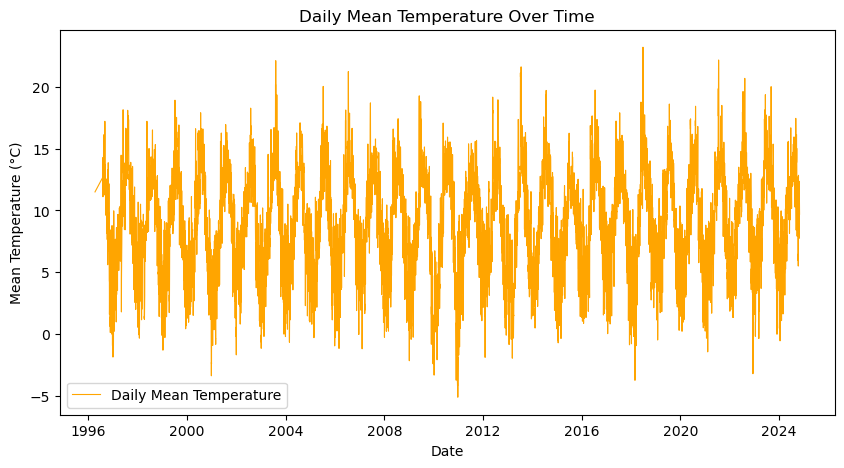

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, label='Daily Mean Temperature', color='orange', linewidth=0.8)
# extracting the date and mean from the grouped data in 'daily_mean_temp' here using .index and .values
plt.title('Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

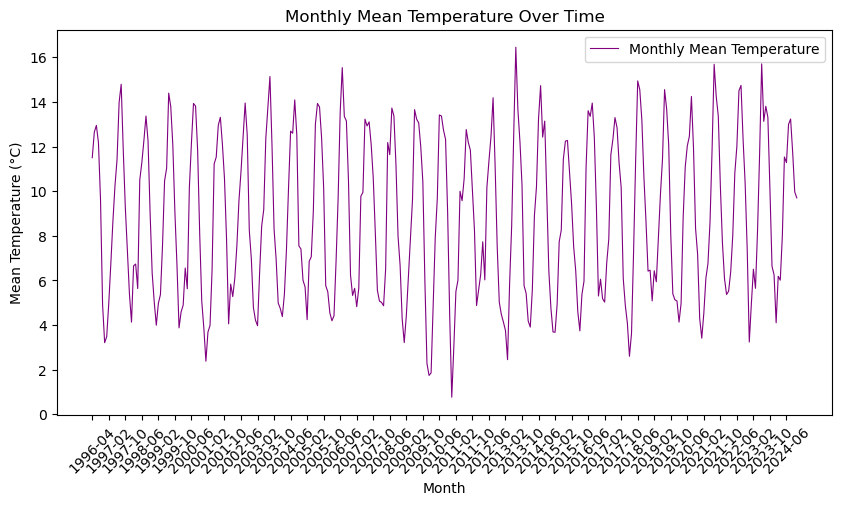

In [23]:
# Extracting the month and year for grouping
df['month'] = df['date'].dt.to_period('M')  # 'M' for monthly period

# Group by month and calculate the mean temperature
monthly_mean_temp = df.groupby('month')['temp'].mean()

# Plot the mean temperature for each month
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean_temp.index.astype(str), monthly_mean_temp.values, label='Monthly Mean Temperature', color='purple', linewidth=0.8)
plt.title('Monthly Mean Temperature Over Time')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(monthly_mean_temp.index.astype(str)[::8], rotation=45)  # Show every 6th tick and rotate x-axis labels for better readability
plt.legend()
plt.show()